In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
df=pd.read_csv("my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df1=df

#  `EDA`

In [4]:
df1.drop(df1.iloc[:,0:5],axis=1,inplace=True)

In [5]:
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
count = df.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [8]:
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_3260\2940590238.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count.sort_values(0, ascending = False, inplace=True)


,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


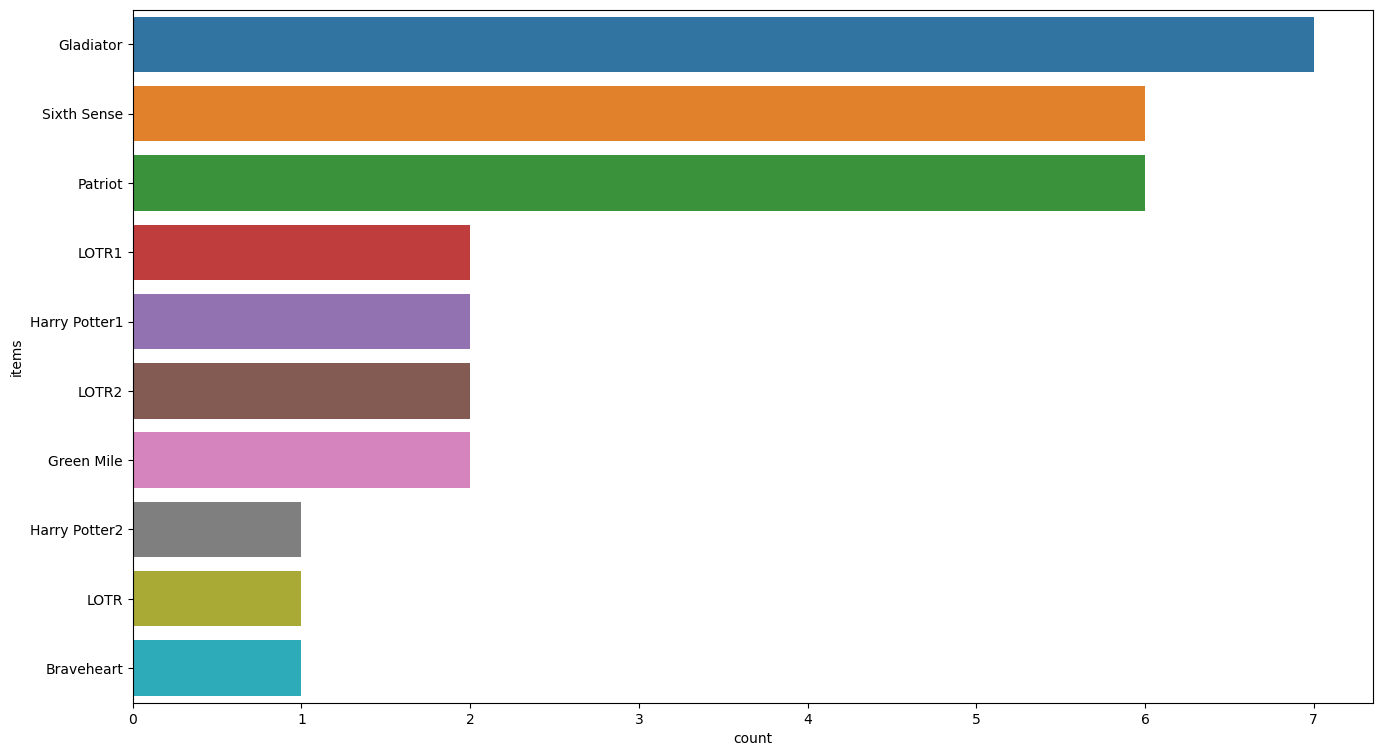

In [9]:
plt.figure(figsize = (16,9))
sns.barplot(x = 'count', y = 'items', data= count)
plt.show()

# `Insights`
1) As we can see Gladiator is the most watched movie followed by Sixth Sense

# `Using Apriori`

In [10]:
frequent_items=apriori(df1,min_support=0.1,use_colnames=True)

C:\Users\Gaurang\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


# `Using Associaion`

In [12]:
rules=association_rules(frequent_items,metric='lift',min_threshold=0.7)

In [13]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(LOTR1, Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(LOTR2, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Harry Potter1),"(LOTR2, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(LOTR1),"(LOTR2, Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [14]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
185,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
158,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
156,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
227,"(LOTR2, Green Mile, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
155,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
226,"(LOTR2, LOTR1, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
225,"(LOTR2, Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
183,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
184,"(LOTR2, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
148,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


# `Insights`
1) 60 percent of 100 purchases are Sixth Sense
2) 70 percent of 100 purchases are Gladiator

# `Visualizations`

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

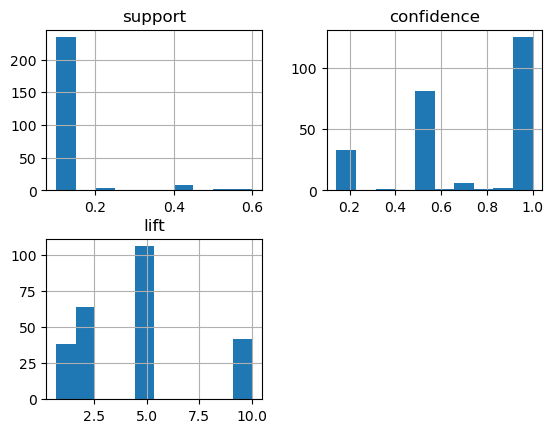

In [15]:
rules[['support','confidence','lift']].hist()

In [18]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(LOTR1, Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(LOTR2, LOTR1, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Harry Potter1),"(LOTR2, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(LOTR1),"(LOTR2, Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


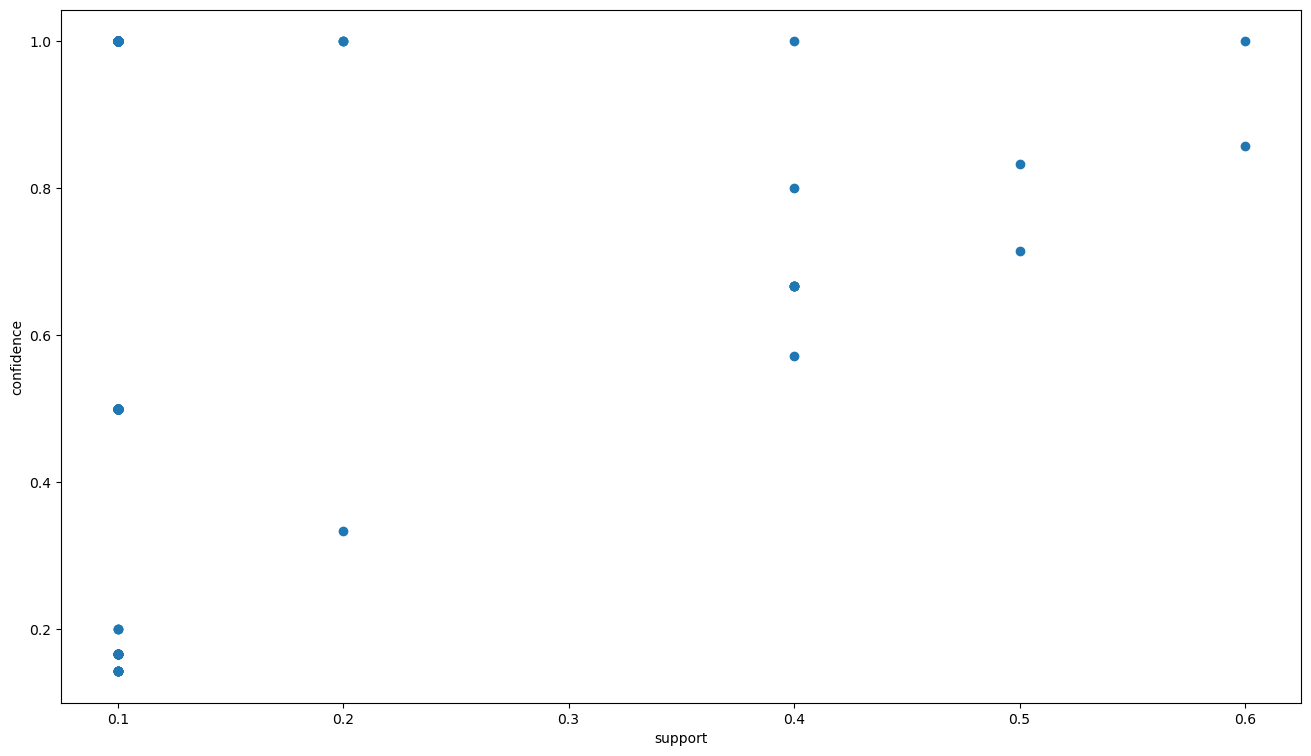

In [25]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

1) Around 4 Movie combination have lift of 1 which means they have high probability of being watched by customer with same interests